### Example Neural Network

In [7]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
# number of features, dense layers (how many neurons)
n_features = 10
n_dense_neurons = 3

In [4]:
"""
for defining shape:
- None at 0 - depends on batch size of the data
- number of features at 1 - usually done this way
"""

# Define variables and placeholders
x = tf.placeholder(tf.float32, (None, n_features))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

# TF operations (simple)
xW = tf.matmul(x, W); z = tf.add(xW, b)

In [5]:
# Define activation function (to pass results)
a = tf.sigmoid(z)

# Initialize a TF Session
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict = 
                         {x: np.random.random([1, n_features])})

In [6]:
print(layer_out)

[[0.725475   0.43900672 0.30847842]]


###  Simple linear regression using TensorFlow

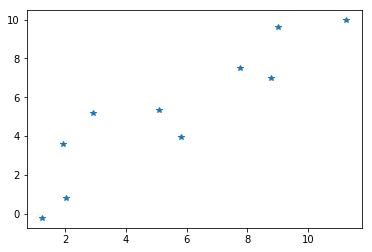

In [9]:
# Create random data with linear trend
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label = np.linspace(1, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

plt.plot(x_data, y_label, "*")
plt.show()

In [10]:
np.random.rand(2) # totally random

array([0.68067777, 0.52154819])

In [11]:
# Initialize the variables using random numbers
m = tf.Variable(0.68)
b = tf.Variable(0.52)

error = 0

for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [47]:
# To minimize error (gradient descend)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.002)
train = optimizer.minimize(error)

# Global initializer
init = tf.global_variables_initializer()

# Create the session and run:
with tf.Session() as sess:
    sess.run(init)
    train_steps = 10
    for i in range(train_steps):
        sess.run(train)
        
    slope_, intercept_ = sess.run([m, b])

In [48]:
x_test = np.linspace(-1, 11, 10)
y_pred = x_test*slope_ + intercept_

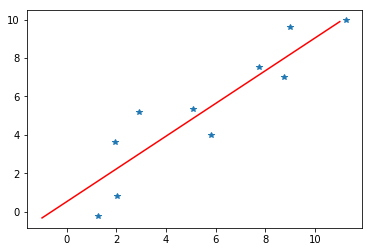

In [50]:
# Careful with learning rate, steps may not be as important
plt.plot(x_data, y_label, "*")
plt.plot(x_test, y_pred, 'red')
plt.show()